<a href="https://colab.research.google.com/gist/jgibbons94/87858e0d38a660c350db9184cc7c1b98/05_1_nfa_and_re_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Four Problems for Week 05's Assignment 

Problem 1:

    a. take a given nfa called nfa1
    
    b. convert it to dfa1 
    
    c. reverse nfa1 by hand obtaining rnfa1
    
    d. inspect and conclude (listing six paths) that rnfa1 is indeed a reverse of nfa1

Problem 2:

    a. learn about a few DFA utilities such as totalize_dfa and dotObj_dfa_w_bh
    
    b. extract an RE by inspecting nfa1 and write it down as RE1_hand
    
    c. reverse RE1_hand by inspection, writing the result down as Rev_RE1_hand
    
    d. Understand the function del_gnfa_states via its help command
    

Problem 3:

    a. obtain a GNFA for rnfa1, calling it grnfa1
    
    b. apply two elimination orders for states on grnfa1
    
    c. obtain Rev_RE1 and Rev_RE2
    
    d. check that Rev_RE1 and Rev_RE2 and Rev_RE1_hand are all isomorphic
    

Problem 4:

    a. print the NFA for Rev_RE2 and answer the stated questions.
    
    b. print the NFA for Rev_RE1_hand and answer the stated questions. 

# Imports 


In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
  
  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty',
                   '../Jove',      '../Jove/jove']

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.Def_NFA2RE import *
from jove.Def_RE2NFA import *
from jove.AnimateNFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)
help(accept

## Problem 1: 

In [2]:
# Given NFA
# RE is (a(bs*(d+f)+c)+''s*(f+d))
nfa1 = md2mc('''NFA
I1 : '' -> B
I1 : a  -> I2

I2 : c  -> F3
I2 : b  -> B

B : s  -> B
B : d  -> F4
B : f  -> F3


''')


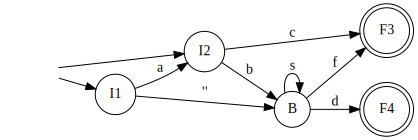

In [3]:
dotObj_nfa(nfa1)

## 1.1: Convert the given NFA to a DFA by hand.

Use as many bullets as necessary to clearly show your work:

* We started with an initial state consisting of all of the NFA's initial states eclosured. This became I1_I2_B

* We went from our initial state and transitioned from I1 through 'a' to I2. B and I2 have no 'a' transition, so their paths ended. We now have state I2.

* We went from our initial state and transitioned from I2 through 'b' to B. I1 and B have no 'b' transition, so their paths ended. We now have state _I2. We added an underscore to show that it is not our DFA's initial state.

* We went from our initial state and transitioned from I2 through 'c' to F3. I1 and B have no 'c' transition, so their paths end

* We went from our initial state and transitioned from B through 's' to B. I1 and I2 have no 's' transition, so their paths end.

* We went from our initial state and transition from B through 'd' to F4. I1 and I2 have no 'd' transition, so their paths end.

* We went from our initial state and transition from B through 'f' to F3. I1 and I2 have no 'd' transition, so their paths end.

* Our state set is now {I1_I2_B, _I2, F3, B, F4}. We will repeat this process through the remainder of these states. Since these states are all sets of one element, we can treat these steps like any other DFA.

* _I2 transitions through 'b' to B.

* _I2 transitions through 'c' to F3.

* F3 has no output transitions.

* B transitions through 's' to B.

* B transitions through 'd' to F4

* B transitions through 'f' to F3.

* F4 has no output transitions.

* For each of the states, we added a transition to a black hole state for each element of $\Sigma$ that did not already have a corresponding transition.

* We transitioned the black hole state to itself through every element of $\Sigma$.

* We commented out every reference to the black hole state.


In [4]:
# DFA of nfa1

dfa1 = md2mc('''DFA

I1_I2_B : b | s -> B

I1_I2_B : a -> _I2

I1_I2_B : f | c -> F3

I1_I2_B : d -> F4

!!_I2 : a | f | d | s -> H

_I2 : c -> F3

_I2 : b -> B

B : s -> B

B : f -> F3

B : d -> F4

!!B : a | b | c -> H

!!F3 : a | b | c | f | d | s -> H

!!F4 : a | b | c | f | d | s -> H

!!H : a | b | c | f | d | s -> H

''')

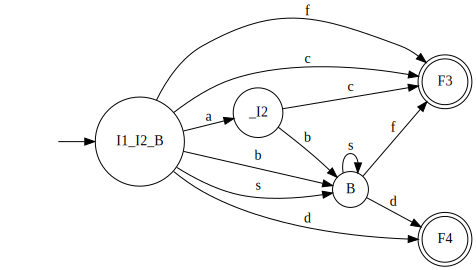

In [5]:
dotObj_dfa(dfa1, FuseEdges=False)

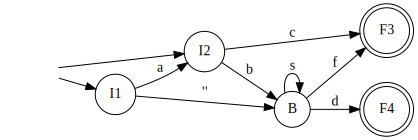

In [6]:
dotObj_nfa(nfa1)

## 1.2: Reverse nfa1 by hand and name the states in this manner:

1) Change F3 to I3

2) Change F4 to I4

3) Change I1 and I2 to F1 and F2

4) Now, reverse the transitions of nfa1, obtaining "rnfa1" below
 

In [7]:
# There is no Jove function to reverse automatically - do it by hand!
rnfa1 = md2mc('''
NFA


I3 : f -> B
I3 : c -> F2

I4 : d -> B

B : b  -> F2
B : '' -> F1
B : s  -> B

F2 : a -> F1


''')

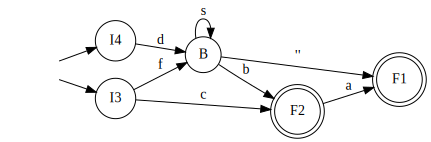

In [8]:
dotObj_nfa(rnfa1)

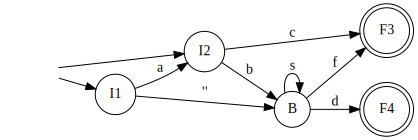

In [9]:
dotObj_nfa(nfa1)

## 1.3: Inspect and conclude that rnfa1 is truly the reverse of nfa1
### List the first six strings in numeric order and check that they have been correctly reversed. State the string in the original machine and explain (by specifying a path as a sequence of states) that this string is present in the reversed machine also.

1. c -> c `{I3, F2}`

2. d -> d `{I4, B, F1}`

3. f -> f `{I3, B, F1}`

4. ac -> ca `{I3, F2, F1}`

5. sd -> ds `{I4, B, B, F1}`

6. sf -> fs `{I3, B, B, F1}`

 
 

# Problem 2: Extraction of RE by Inspection and other things before it


## 2.1: Totalize dfa1 to obtain the totalized machine, then explain totalize_dfa in a few sentences below, by looking at the Delta before and After

In [10]:
tdfa1 = totalize_dfa(dfa1)

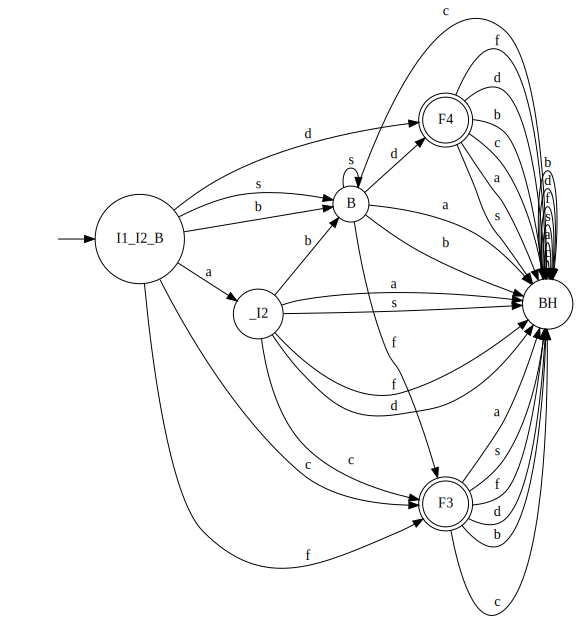

In [11]:
dotObj_dfa_w_bh(tdfa1)

### Your explanation of totalize_dfa:

* For any input in $\sum$ where a state does not have a transition, the next state becomes the black hole. 

* For any input received by the black hole, the next state is the black hole.



##  Compare the dfa with and without the black hole:

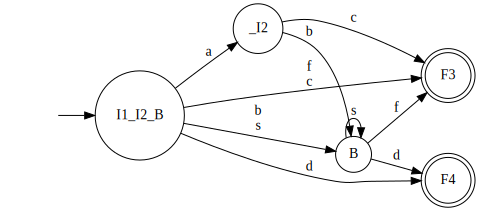

In [12]:
dotObj_dfa(tdfa1, FuseEdges=True)

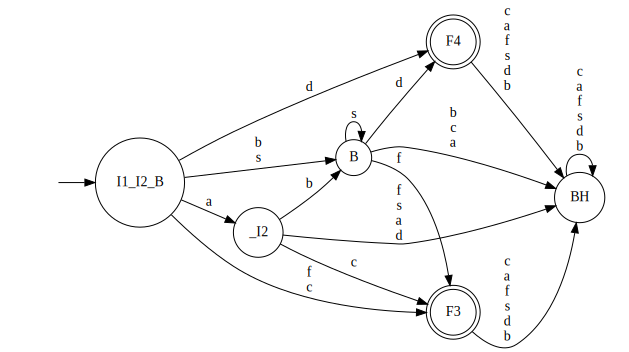

In [13]:
dotObj_dfa_w_bh(tdfa1, FuseEdges=True)

### Was it a good idea to not always show black-holes?

* In what circumstances might you still need to apply the _w_bh view option?
An open-ended answer - anything you may think up can be a valuable piece of feedback.

Answer:

* Drawing the black hole can matter when multiple black hole states exist in a DFA system or a system modeled as a DFA.
* It's helpful to not draw the black holes when doing so would cause unnecessary clutter in the drawing. 


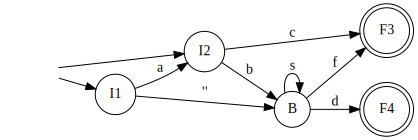

In [14]:
dotObj_nfa(nfa1)

## 2.2: Obtain an RE by looking at nfa1

* Follow all paths

* Summarize the paths in your head, using the Star operator suitably




In [15]:
RE1_hand = "(a (((b (s*) (d + f)) + c)) + '' (s*) (f + d) + (b (s*) (d + f)) + c)"

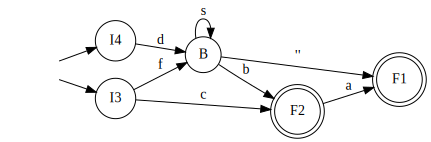

In [16]:
dotObj_nfa(rnfa1)

## 2.3: Reverse RE1 by hand to obtain Rev_RE1

Once you have an RE, you can "visually reverse it" for simple REs

In [17]:
Rev_RE1_hand = "(f (((s*) (( b + (b a) ) + '')) )) + (c + c a) + (d ((s*) (b + (b a) + '')))"

## 2.4: Understand del_gnfa_states via help

In [18]:
help(del_gnfa_states)

Help on function del_gnfa_states in module jove.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



In [19]:
# help of del_gnfa_states run below

### Document what you learned from the function help of del_gnfa_states and summarize below


* del_gnfa_states deletes everything but the final state.

* If Real_I or Real_F are defined, they are preserved.

* The order to delete states can be provided in DelList.

* This function returns a triple containing the gnfa, a dot object that shows the deletion order, and a regular expression

# Problem 3: Converting to GNFA and Attempting Two Elimination Orders

Work on rnfa1 to obtain Rev_RE1 and Rev_RE2 

## 3.1: Obtain grnfa1 below via a suitable command

In [20]:
grnfa1 = mk_gnfa(rnfa1)

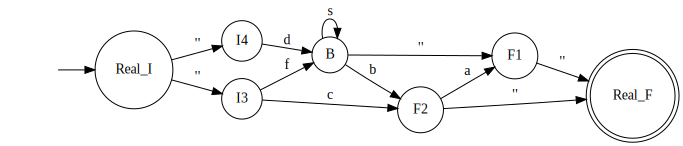

In [21]:
dotObj_gnfa(grnfa1)

## 3.2: Apply the elimination order by supplying the second argument 
['B', 'F2', 'F1', 'I3', 'I4']

as you learned in the help

In [22]:
help(del_gnfa_states)

Help on function del_gnfa_states in module jove.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



In [23]:
(Gfinal, DO, Rev_RE1) = del_gnfa_states(grnfa1, DelList=['B','F2','F1','I3','I4'])

**** Eliminating state B ****
**** Eliminating state F2 ****
**** Eliminating state F1 ****
**** Eliminating state I3 ****
**** Eliminating state I4 ****


In [24]:
Gfinal

{'Q': {'Real_F', 'Real_I'},
 'Sigma': {('+',
   (('+',
     (('+',
       (('+',
         (('+',
           (('+',
             (('.', (('.', ('d', ('.', (('*', 's'), 'b')))), 'a')),
              ('.', ('d', ('*', 's'))))),
            ('.', ('d', ('*', 's'))))),
          ('.', ('d', ('.', (('*', 's'), 'b')))))),
        ('.', ('d', ('.', (('*', 's'), 'b')))))),
      ('+',
       (('+',
         (('+',
           (('+',
             (('.',
               (('+',
                 (('+', (('.', ('f', ('.', (('*', 's'), 'b')))), 'c')), 'c')),
                'a')),
              ('.', ('f', ('*', 's'))))),
            ('.', ('f', ('*', 's'))))),
          ('+', (('+', (('.', ('f', ('.', (('*', 's'), 'b')))), 'c')), 'c')))),
        ('+', (('+', (('.', ('f', ('.', (('*', 's'), 'b')))), 'c')), 'c')))))),
    ('+',
     (('+',
       (('+',
         (('+',
           (('.',
             (('+',
               (('+', (('.', ('f', ('.', (('*', 's'), 'b')))), 'c')), 'c')),
              'a')),

In [25]:
for i in DO:
  print(i)

// GO_St12
digraph {
	graph [rankdir=LR]
	EMPTY [label="" shape=plaintext]
	B [label=B peripheries=1 shape=circle]
	I4 [label=I4 peripheries=1 shape=circle]
	F1 [label=F1 peripheries=1 shape=circle]
	I3 [label=I3 peripheries=1 shape=circle]
	Real_I [label=Real_I peripheries=1 shape=circle]
	F2 [label=F2 peripheries=1 shape=circle]
	Real_F [label=Real_F peripheries=2 shape=circle]
	EMPTY -> Real_I
	I3 -> B [label="f "]
	I3 -> F2 [label="c "]
	I4 -> B [label="d "]
	B -> F2 [label="b "]
	B -> F1 [label="'' "]
	B -> B [label="s "]
	F2 -> F1 [label="a "]
	Real_I -> I4 [label="'' "]
	Real_I -> I3 [label="'' "]
	F1 -> Real_F [label="'' "]
	F2 -> Real_F [label="'' "]
}
// GO_St13
digraph {
	graph [rankdir=LR]
	EMPTY [label="" shape=plaintext]
	I4 [label=I4 peripheries=1 shape=circle]
	F1 [label=F1 peripheries=1 shape=circle]
	I3 [label=I3 peripheries=1 shape=circle]
	Real_I [label=Real_I peripheries=1 shape=circle]
	F2 [label=F2 peripheries=1 shape=circle]
	Real_F [label=Real_F peripheries=2 s

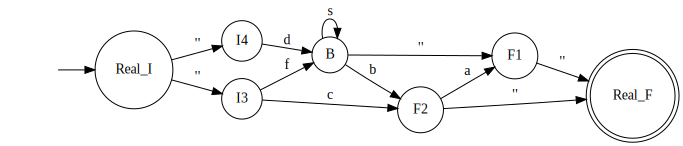

In [26]:
DO[0]

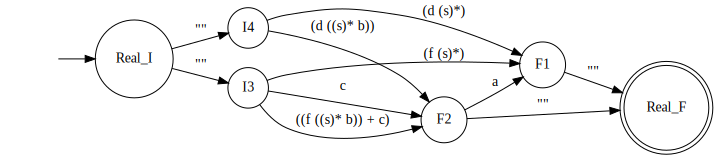

In [27]:
DO[1]

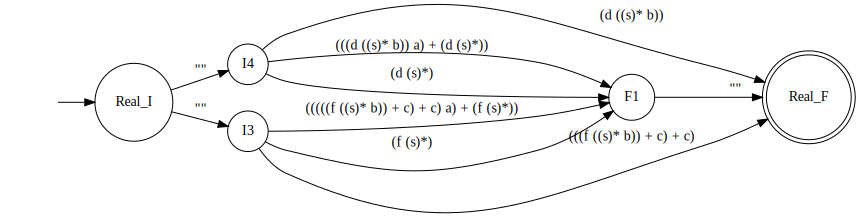

In [28]:
DO[2]

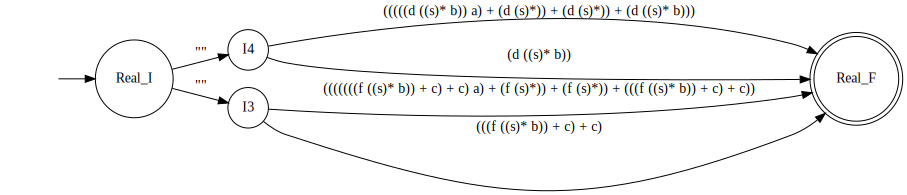

In [29]:
DO[3]

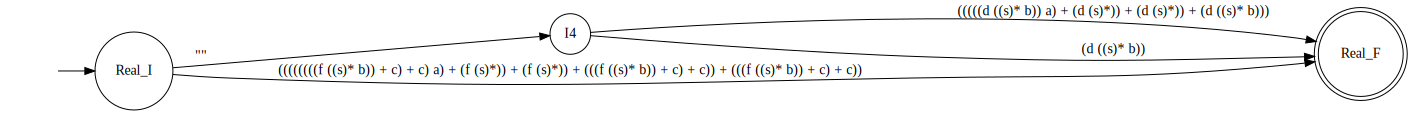

In [30]:
DO[4]

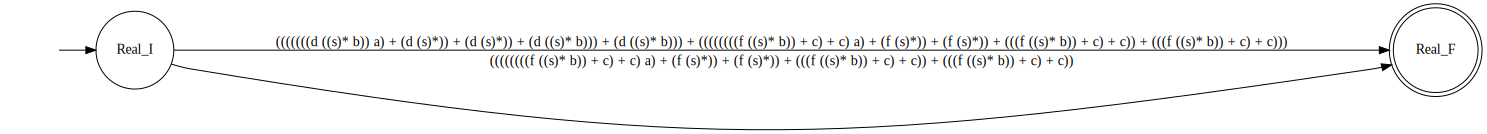

In [31]:
DO[5]

In [32]:
Rev_RE1

'((((((((d ((s)* b)) a) + (d (s)*)) + (d (s)*)) + (d ((s)* b))) + (d ((s)* b))) + ((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c))) + ((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c)))'

Generating LALR tables


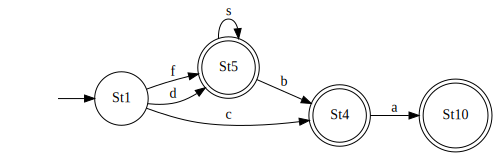

In [33]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1))))

## 3.3: Apply the elimination order by supplying the second argument 
 ['I3', 'I4', 'F1', 'B', 'F2' ]

as you learned in the help

In [34]:
(Gfinal, DO, Rev_RE2) = del_gnfa_states(grnfa1, DelList=['I3', 'I4', 'F1', 'B', 'F2'])

**** Eliminating state I3 ****
**** Eliminating state I4 ****
**** Eliminating state F1 ****
**** Eliminating state B ****
**** Eliminating state F2 ****


In [35]:
Rev_RE2

'((((((((d + f) + f) ((s)* b)) + c) + c) ((a + "") + "")) + (((d + f) + f) (s)*)) + (((d + f) + f) (s)*))'

Generating LALR tables


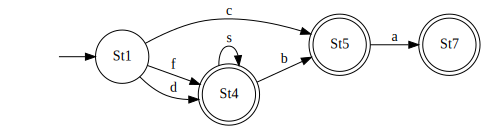

In [36]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE2))))

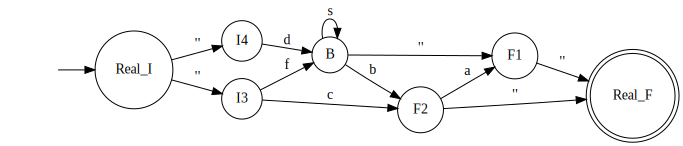

In [37]:
DO[0]

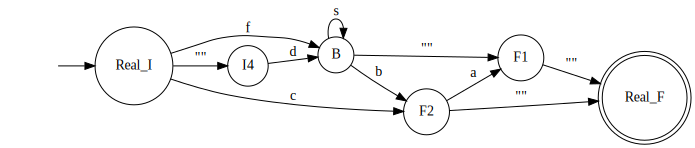

In [38]:
DO[1]

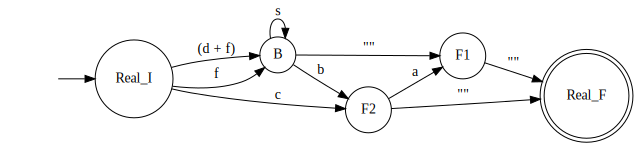

In [39]:
DO[2]

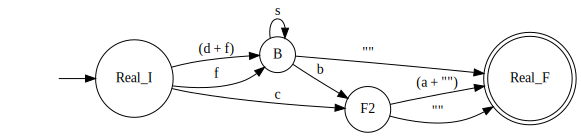

In [40]:
DO[3]

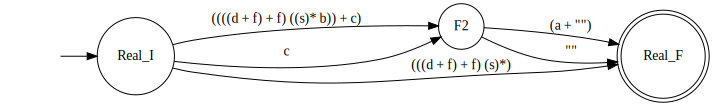

In [41]:
DO[4]

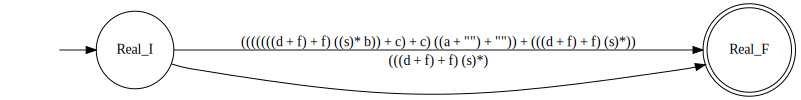

In [42]:
DO[5]

## Examine DO[0] through DO[Last_Legal_Item] (find out how long DO is)

DO[0] is the initial GNFA machine, DO[1] is the next one, and so on. You will see each step getting
rid of one state.

### Summarize your observation of the state elimination and which REs were introduced as a result. Use one bullet per question answered below.

* DO[0]: The states {Real_I, Real_F} are added with epsilon transitions from {Real_I} to {I3, I4} and from {F1, F2} to {Real_F}

* DO[1]: The state {I3} is removed and {Real_I} gains the trainsitions {f -> B, c -> F2}

* DO[2]: The state {I4} is removed and {Real_I} replaces the transition {f -> B} with the transition {(d + f) -> B}

* DO[3]: The state {F1} is removed and {F2} gains the trainsition {(a + "") -> Real_F}. The state {B} loses the transition {"" -> F1} and gains the transition {"" -> Real_F}

* DO[4]: The state {B} is removed. {Real_I} gains the transition {(((d + f) + f) (s)*) -> Real_F, c -> F2, ((((d+f)+f)((s)*b))+c)

* DO[5]: The state {F2} is removed. {Real_I} gains the transition {((((((((d + f) + f) ((s)* b)) + c) + c) ((a + "") + "")) + (((d + f) + f) (s)*)) + (((d + f) + f) (s)*)) -> Real_F}


In [43]:
(Gfinal, DO, Rev_RE1) = del_gnfa_states(grnfa1, ['B', 'F2', 'F1', 'I3', 'I4'])

**** Eliminating state B ****
**** Eliminating state F2 ****
**** Eliminating state F1 ****
**** Eliminating state I3 ****
**** Eliminating state I4 ****


In [44]:
Rev_RE1

'((((((((d ((s)* b)) a) + (d (s)*)) + (d (s)*)) + (d ((s)* b))) + (d ((s)* b))) + ((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c))) + ((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c)))'

## Examine DO[0] through DO[Last_Legal_Item] (find out how long DO is)

### Summarize your observation of the state elimination and which REs were introduced as a result
NOTE: any time a state is removed, all of its associated transitions are also removed.

* DO[0]: The states {Real_I} and {Real_F} are introduced. Epsilon transitions between {Real_I -> I3, I4} and {F1, F2 -> Real_F} are created.

* DO[1]: The state {B} is removed. {I4} gains the transitions {(d(s)*) -> F1, (d ((s)*b)) -> F2}. {I3} gains the transition {((f((s)*b))+c) -> F2, (f(s)*) -> F1}.

* DO[2]: The state {F2} is removed. {I3} gains the transitions {(((f((s)*b)) + c) + c) -> Real_F, (((((f ((s)* b)) + c) + c) a) + (f (s)*)) -> F1} and keeps the transition {(f(s)*) to F1}. {I4} gains the transition {(((d ((s)* b)) a) + (d (s)*)) -> F1, (d((s)*b) -> Real_F}.

* DO[3]: The state {F1} is removed. {I3} gains the transition {(((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) -> Real_F}. {I4} gains the transition {(((((d ((s)* b)) a) + (d (s)*)) + (d (s)*)) + (d ((s)* b))) -> Real_F}.

* DO[4]: The state {I3} is removed. {Real_I} gains the transition {((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c)) -> Real_F}.

* DO[5]: The state {I4} is removed. {Real_I} gains the transition {(((((((d ((s)* b)) a) + (d (s)*)) + (d (s)*)) + (d ((s)* b))) + (d ((s)* b))) + ((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c))) -> Real_F}.

*

## 3.4: Check for isomorphism as requested between Rev_RE1 and Rev_RE2

Apply a Jove call that is compact (and will be given in class) that checks that Rev_RE1 and Rev_RE2 are equivalent. It has to involve iso_dfa and min_dfa and other calls.

In [45]:
iso_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1))), min_dfa(nfa2dfa(re2nfa(Rev_RE2))))

Generating LALR tables
Generating LALR tables


True

In [46]:
# Just look at it again for comparison
Rev_RE1_hand

"(f (((s*) (( b + (b a) ) + '')) )) + (c + c a) + (d ((s*) (b + (b a) + '')))"

## 3.5: Check for isomorphism as requested between Rev_RE1 and Rev_RE1_hand

Same methods as above.

In [47]:
iso_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1))), min_dfa(nfa2dfa(re2nfa(Rev_RE1_hand))))

Generating LALR tables
Generating LALR tables


True

# Problem 4: Chasing down the RE2NFA components

Find out where the s* components are and explain the set of all strings that precede s* in Rev_RE2 and the NFA of Rev_RE2

Find out where the ending "a" is, and find out the set of all the symbols that precede a

Let's first look at the NFA and then see where the RE "parts" are in it.

Generating LALR tables


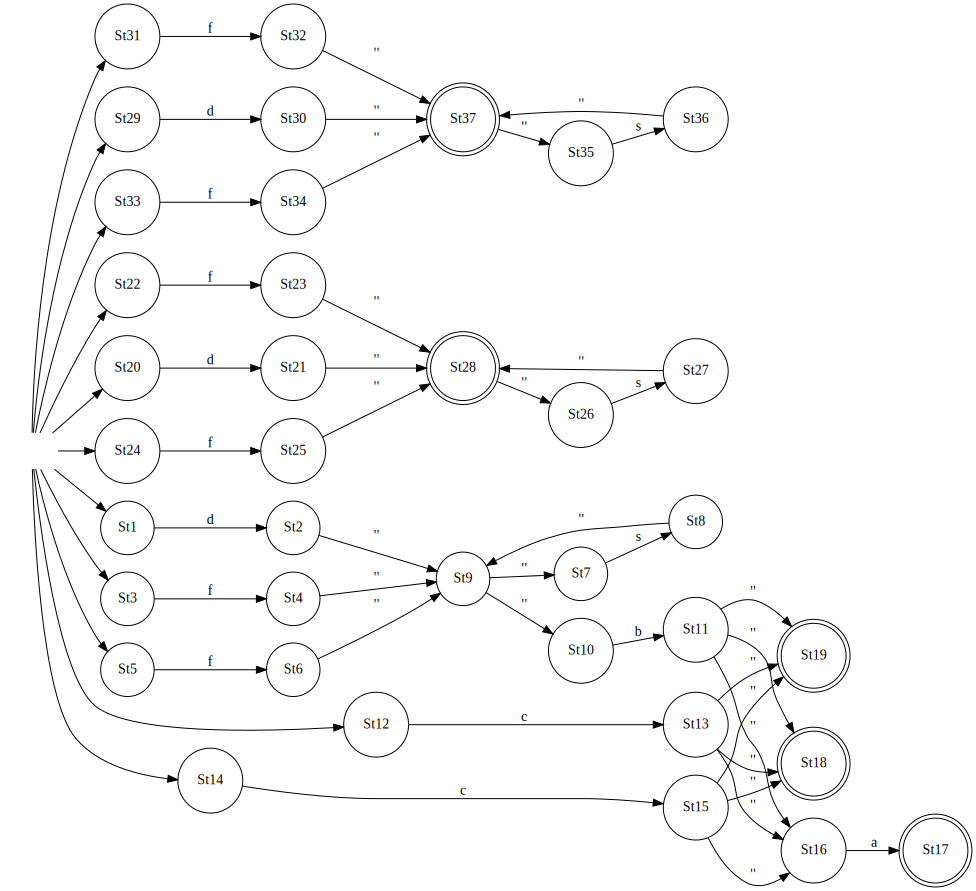

In [48]:
dotObj_nfa(re2nfa(Rev_RE2))


This is an exercise in explaining how Rev_RE2 got translated to an NFA. You are to pick these cases and find an example of each, and explain below. What you pick does not matter.

* Find a case where a Star is used, and explain the construction, pointing to the states involved. Use up to 6 bullets below. More or less based on how you explain (clarity not length emphasized).
  - (d + f(s)*) is the case where Star is used.
  - States {St29, St30, St37, St35, St36} are used.
  - {St29} is an initial state, with one transition on {d -> St30}.
  - {St30} has one transition of {'' -> St37}.
  - {St37} has one transition of {'' -> St35}.
  - {St35} has one transition of {s -> St36}.
  - {St36} has one transition of {'' -> St37}.
  - The path {St37, St35, St36} forms a lasso, allowing the "s" Star operation.

* Find a case where the Star follows something (I.e. a concatenation of the form "X" followed by "Star" is used). Show how that concatenation construction is accomplished in the same manner (up to 6 bullets roughly) as above. More or less based on how you explain.
  - (d + f(s)*) is the case where Star is used.
  - States {St28, St26, St27, St20, St21} are used.
  - {St20} is an initial state, with one transition on {d -> St21}.
  - {St21} has one transition of {'' -> St28}.
  - {St28} has one transition of {'' -> St26}.
  - {St26} has one transition of {s -> St27}.
  - {St27} has one transition of {'' -> St28}.
  - The path {St28, St26, St27} forms a lasso, allowing the "s" Star operation.
  
* Find a case where something follows Star (I.e. a concatenation of the form "Star" followed by "X"). Explain how the concatenation is accomplished.
  - ((d ((s)* b)) a) is the case where something follows the Star operation.
  - States {St1, St2, St9, St7, St8, St10} are used.
  - {St1} is an initial state, with one transition on {d -> St2}.
  - {St2} has one transition of {'' -> St9}.
  - {St9} has two transitions of {'' -> St7, '' -> St10}.
  - {St7} has one transition of {s -> St8}.
  - {St8} has one transition of {'' -> St9}.
  - The path {St9, St8, St7} forms a lasso, allowing part the "s" Star operation.
  - The transition from {St9 -> St10} allows completion of the "s" Star operation by allowing strings with no "s" symbols to be accepted.

Generating LALR tables


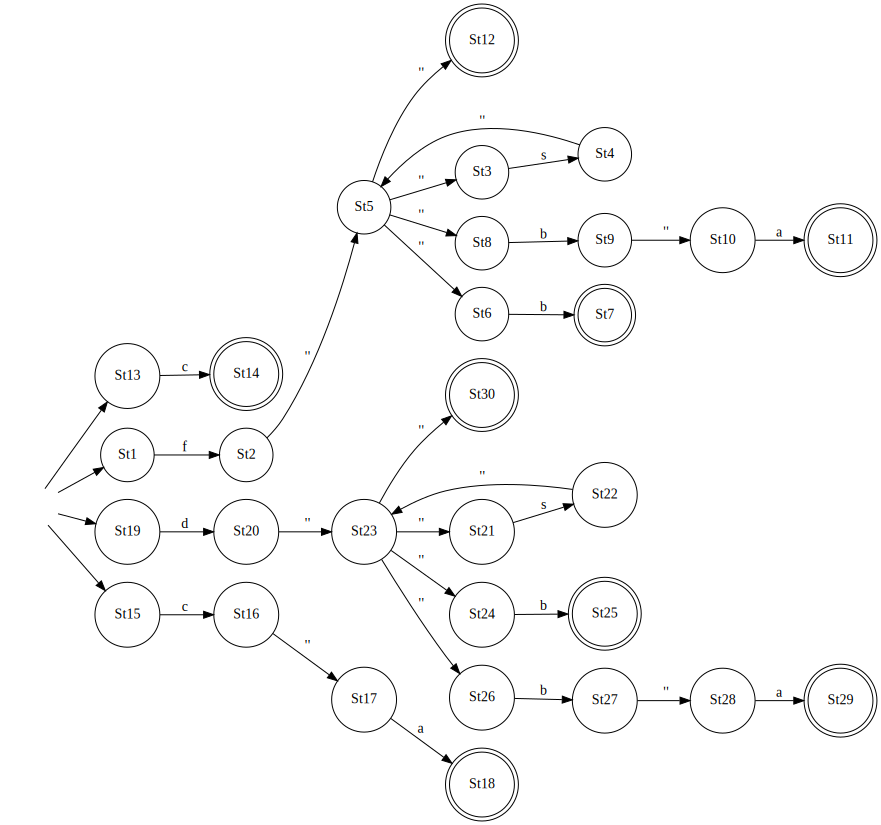

In [49]:
dotObj_nfa(re2nfa(Rev_RE1_hand))

## Repeat finding out the aforesaid paths in your own Rev_RE1_hand


This is an exercise in explaining how Rev_RE1_hand got translated to an NFA. You are to pick these cases and find an example of each, and explain below. What you pick does not matter.

* Find a case where a Star is used, and explain the construction, pointing to the states involved. Use up to 6 bullets below. More or less based on how you explain (clarity not length emphasized).
  - The case (d ((s*) (b + (b a) + '')) is considered.
  - The states involved are: {St19, St20, St23, St21, St22}
  - {St19} is an initial state, with one transition on {d -> St20}.
  - {St20} has one transition of {'' -> St23}.
  - {St23} has one transition of {'' -> St21}.
  - {St21} has one transition of {s -> St22}.
  - {St22} has one transition of {'' -> St23}.
  - The path {St23, St22, St21} forms a lasso, allowing the "s" Star operation.

* Find a case where the Star follows something (I.e. a concatenation of the form "X" followed by "Star" is used). If such a case does not arise in your RE, skip this part. Show how that concatenation construction is accomplished in the same manner (up to 6 bullets roughly) as above. More or less based on how you explain. 
  - The case (d ((s*) (b + (b a) + '')) is considered.
  - The states involved are: {St19, St20, St23, St21, St22}
  - {St19} is an initial state, with one transition on {d -> St20}.
  - {St20} has one transition of {'' -> St23}.
  - {St23} has one transition of {'' -> St21}.
  - {St21} has one transition of {s -> St22}.
  - {St22} has one transition of {'' -> St23}.
  - The path {St23, St22, St21} forms a lasso, allowing the "s" Star operation.
  
* Find a case where something follows Star (I.e. a concatenation of the form "Star" followed by "X"). If such a case does not arise in your RE, skip this part. Explain how the concatenation is accomplished.
  - The case (f (((s*) (( b + (b a) ) + '')) )) is considered.
  - States {St1, St2, St5, St3, St4, St12, St8, St6} are used.
  - {St1} is an initial state, with one transition on {f -> St2}.
  - {St2} has one transition of {'' -> St5}.
  - {St5} has two transitions of {'' -> St3, '' -> St12, '' -> St6, '' -> St8}.
  - {St3} has one transition of {s -> St4}.
  - {St4} has one transition of {'' -> St5}.
  - The path {St3, St4, St5} forms a lasso, allowing part the "s" Star operation.
  - The transitions of {St5} to states {St3, St6, St8, St12} on {''} allows completion of the "s" Star operation by allowing strings with no "s" symbols to be accepted.

# END
